# 1 - Learning for Pricing

Consider the case in which all the users belong to class C1. Assume that the curves related to the advertising part of the problem are known, while the curve related to the pricing problem is not. Apply the UCB1 and TS algorithms, reporting the plots of the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
from User_Classes import UserClass
from UCB import *
from Learner import *
import numpy as np
import matplotlib.pyplot as plt
from Pricing_Environment import *
from Advertising_Environment import *
from TS_Learner import *

In [10]:
uc1 = UserClass(name = "C1")

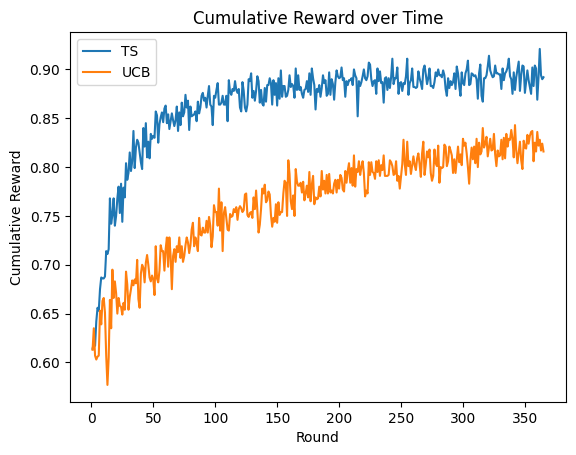

In [11]:
n_arms = 5

p = uc1.get_conversion_probabilities()
env = Environment_Pricing(n_arms=n_arms, p = p)
prices = env.prices

opt = p[0] #optimal arm is the one with the highest probability of success

T = 365 #time steps for each experiment 

n_experiments = 1000

ts_rewards_per_experiment = [] #list to store the collected rewards for TS_Learner over each experiment
ucb_reward_per_experiment = [] #list to store the collected rewards for Greedy_Learner over each experiment

# Loop over the experiments
for e in range (0, n_experiments):
    env_pr = Environment_Pricing(n_arms=n_arms, p = p)
    ts_learner = TS_Learner(n_arms=n_arms)
    ucb_learner = UCB(n_arms=n_arms)
    for t in range(0,T):
        #Thompson sampling
        pulled_arm = ts_learner.pull_arm()
        reward = env_pr.round(class_index=0, price_index=pulled_arm, bid=0.25)
        ts_learner.update(pulled_arm, reward)

        # Greedy
        pulled_arm = ucb_learner.pull_arm()
        reward = env_pr.round(class_index=0, price_index = pulled_arm, bid=0.25)
        ucb_learner.update(pulled_arm, reward)


    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    ucb_reward_per_experiment.append(ucb_learner.collected_rewards)

"""
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(np.cumsum(np.mean(opt - ts_rewards_per_experiment, axis = 0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gr_reward_per_experiment, axis = 0)), 'g')
plt.legend(["TS", "Greedy"])
plt.show()
"""

# Compute the mean and standard deviation of the cumulative reward at each round
mean_cum_reward_ts = np.mean(ts_rewards_per_experiment, axis=0)
std_cum_reward_ts = np.std(ts_rewards_per_experiment, axis=0)

mean_cum_reward_ucb = np.mean(ucb_reward_per_experiment, axis=0)
std_cum_reward_ucb = np.std(ucb_reward_per_experiment, axis=0)

# Plot the results
plt.plot(range(1, T+1), mean_cum_reward_ts, label='TS')

plt.plot(range(1, T+1), mean_cum_reward_ucb, label='UCB')

plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Time')
plt.legend()
plt.show()


## Regret

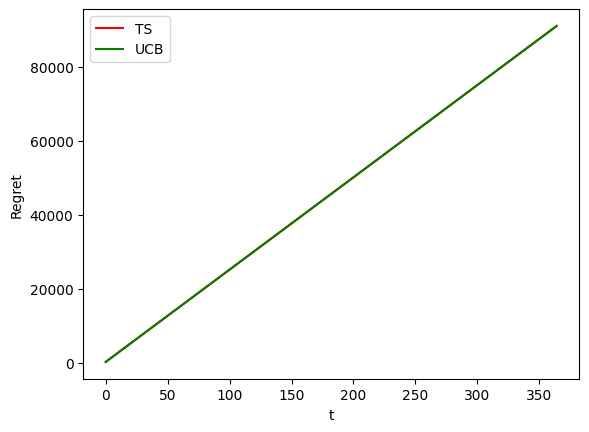

In [12]:
from Clairvoyant import get_optimal_parameters

optimum_price, optimum_bid = get_optimal_parameters(uc1.user_index)

plt.figure(0)
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(np.float64(optimum_price) - ts_rewards_per_experiment, axis = 0)), 'r')
plt.plot(np.cumsum(np.mean(np.float64(optimum_price) - ucb_reward_per_experiment, axis = 0)), 'g')
plt.legend(["TS", "UCB"])
plt.show()

In [14]:

optimum_price, optimum_bid = get_optimal_parameters(uc1.user_index)
optimal_reward = p[calculate_price_index(optimum_price)] * optimum_bid

# Compute the cumulative optimal reward at each round
cum_optimal_reward = np.array([t * optimal_reward for t in range(1, T + 1)])

# Compute the regret for each algorithm
regret_ts = cum_optimal_reward - mean_cum_reward_ts
regret_ucb = cum_optimal_reward - mean_cum_reward_ucb

# Plot the regret over time
plt.plot(range(1, T + 1), regret_ts, label='TS Regret')
plt.plot(range(1, T + 1), regret_ucb, label='UCB Regret')

plt.xlabel('Round')
plt.ylabel('Regret')
plt.title('Regret over Time')
plt.legend()
plt.show()


IndexError: list index out of range